In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
from scipy.io import wavfile

In [2]:
file='C:/Users/JH/Downloads/asdlknads.wav'

In [5]:
try:
    # librosa.load 대신 scipy.io.wavfile.read 사용 (일관성 유지 및 필요시 데이터 타입 변환)
    samplerate, data_int = wavfile.read(file)

    if data_int.ndim > 1:
        data_int = data_int[:, 0] # 스테레오를 모노로 (첫 번째 채널)

    # librosa는 float32를 선호하므로 데이터 타입을 변환하고 정규화
    if data_int.dtype == 'int16':
        y = data_int.astype(np.float32) / 32768.0 # int16 최대값으로 정규화
    elif data_int.dtype == 'int32':
        y = data_int.astype(np.float32) / (2**31)
    elif data_int.dtype == 'float32' or data_int.dtype == 'float64':
        y = data_int.astype(np.float32) # 이미 float인 경우
    else:
        print(f"경고: 예상치 못한 데이터 타입 {data_int.dtype}. float32로 변환 시도.")
        y = data_int.astype(np.float32)
        # float32로 변환 후에도 범위가 크다면 정규화 필요
        if np.max(np.abs(y)) > 1.0:
            y = y / np.max(np.abs(y))


    print(f"'{file}' 파일 정보:")
    print(f"샘플링 레이트: {samplerate} Hz")
    print(f"오디오 데이터 형태 (모노, float32): {y.shape}")
    duration = len(y) / samplerate
    print(f"재생 시간: {duration:.2f} 초")

except FileNotFoundError:
    print(f"오류: '{file}' 파일을 찾을 수 없습니다. 파일 경로를 확인해 주세요.")
    print("어제 만든 'my_recorded_audio.wav' 파일을 사용하거나, 샘플 WAV 파일을 준비하세요.")
    exit()

except Exception as e:
    print(f"파일을 로드하는 중 오류 발생: {e}")
    exit()

'C:/Users/JH/Downloads/asdlknads.wav' 파일 정보:
샘플링 레이트: 44100 Hz
오디오 데이터 형태 (모노, float32): (12544000,)
재생 시간: 284.44 초


C:\Users\JH\AppData\Local\Temp\ipykernel_24048\368578556.py:13: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 그래프 요소들이 겹치지 않게 배치
C:\Users\JH\AppData\Local\Temp\ipykernel_24048\368578556.py:13: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 그래프 요소들이 겹치지 않게 배치
C:\Users\JH\AppData\Local\Temp\ipykernel_24048\368578556.py:13: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 그래프 요소들이 겹치지 않게 배치
C:\Users\JH\AppData\Local\Temp\ipykernel_24048\368578556.py:13: UserWarning: Glyph 52992 (\N{HANGUL SYLLABLE KE}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 그래프 요소들이 겹치지 않게 배치
C:\Users\JH\AppData\Local\Temp\ipykernel_24048\368578556.py:13: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 그래프 요소들이 겹치지 않게 배치
C:\Users\JH\AppData\Local\Temp\ipykernel_24

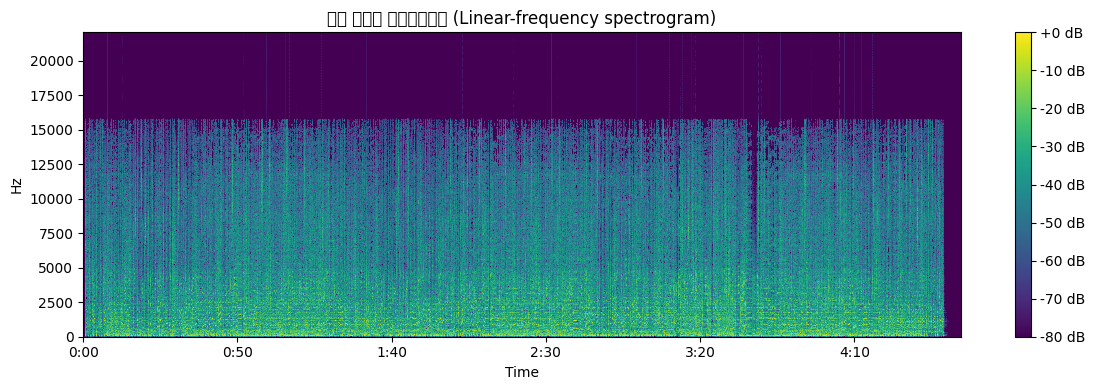

In [10]:
n_fft=2048
hop_length=512

D=librosa.stft(y,n_fft=n_fft,hop_length=hop_length)

s_db=librosa.amplitude_to_db(np.abs(D),ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(s_db,sr=samplerate,x_axis='time', y_axis='hz',
                         cmap='viridis', hop_length=hop_length)
plt.colorbar(format='%+2.0f dB') # 데시벨 스케일의 컬러바 추가
plt.title('선형 스케일 스펙트로그램 (Linear-frequency spectrogram)')
plt.tight_layout() # 그래프 요소들이 겹치지 않게 배치
plt.show()

In [16]:
n_mel=128
M=librosa.feature.melspectrogram(y=y,sr=samplerate,n_fft=n_fft,hop_length=hop_length,n_mels=n_mel)
M_db=librosa.amplitude_to_db(M,ref=np.max)


C:\Users\JH\AppData\Local\Temp\ipykernel_24048\631614394.py:6: UserWarning: Glyph 47708 (\N{HANGUL SYLLABLE MEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\JH\AppData\Local\Temp\ipykernel_24048\631614394.py:6: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\JH\AppData\Local\Temp\ipykernel_24048\631614394.py:6: UserWarning: Glyph 54169 (\N{HANGUL SYLLABLE PEG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\JH\AppData\Local\Temp\ipykernel_24048\631614394.py:6: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\JH\AppData\Local\Temp\ipykernel_24048\631614394.py:6: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\JH\AppData\Local\Temp\ipykernel_24048\631614394.py:6: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
  plt.ti

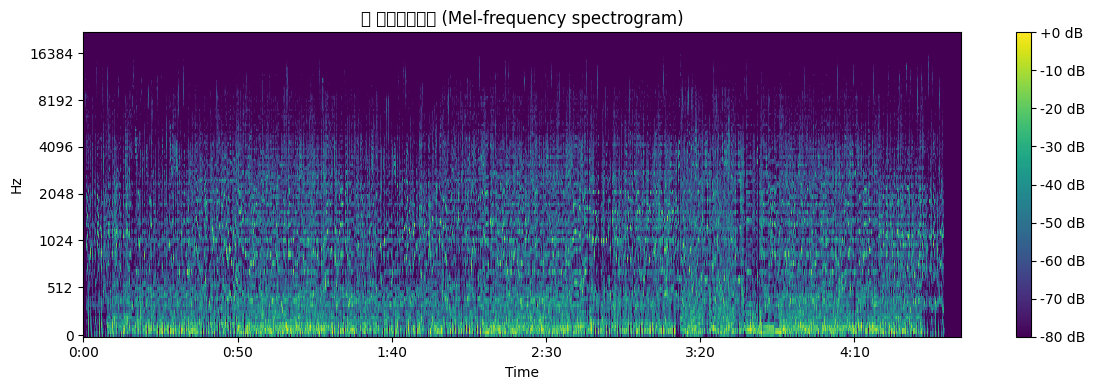


--- 스펙트로그램 분석 팁 ---
1. X축은 시간, Y축은 주파수를 나타냅니다.
2. 색상(밝기)은 해당 시간/주파수 대역의 에너지(소리 강도)를 나타냅니다.
3. 일반 스펙트로그램(위)은 주파수 스케일이 선형적이지만,
   멜 스펙트로그램(아래)은 저주파수에 더 많은 해상도를 가집니다.
   (Y축 레이블이 Hz 대신 Mel로 표시됩니다.)
4. 음성인식/합성 모델은 주로 멜 스펙트로그램을 입력으로 사용합니다.


In [18]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(M_db, sr=samplerate, x_axis='time', y_axis='mel',
                         cmap='viridis', hop_length=hop_length)
plt.colorbar(format='%+2.0f dB')
plt.title('멜 스펙트로그램 (Mel-frequency spectrogram)')
plt.tight_layout()
plt.show()

print("\n--- 스펙트로그램 분석 팁 ---")
print("1. X축은 시간, Y축은 주파수를 나타냅니다.")
print("2. 색상(밝기)은 해당 시간/주파수 대역의 에너지(소리 강도)를 나타냅니다.")
print("3. 일반 스펙트로그램(위)은 주파수 스케일이 선형적이지만,")
print("   멜 스펙트로그램(아래)은 저주파수에 더 많은 해상도를 가집니다.")
print("   (Y축 레이블이 Hz 대신 Mel로 표시됩니다.)")
print("4. 음성인식/합성 모델은 주로 멜 스펙트로그램을 입력으로 사용합니다.")

아주 좋은 질문입니다! 푸리에 변환(FT)과 단시간 푸리에 변환(STFT)의 핵심적인 차이점을 명확히 이해하는 것이 중요합니다.

간단하게 요약하면 다음과 같습니다:

* **푸리에 변환 (FT):** **전체 신호**에 대해 **'어떤 주파수 성분이 있는가?'**를 알려주지만, **'언제 그 주파수 성분이 나타나는가?'**는 알려주지 않습니다.
* **단시간 푸리에 변환 (STFT):** **짧은 시간 구간(프레임)**별로 푸리에 변환을 수행하여, **'언제 어떤 주파수 성분이 나타나는가?'**를 시간에 따라 추적할 수 있도록 해줍니다.

---

### 푸리에 변환 (FT: Fourier Transform)

**개념:**
하나의 신호(예: 음성 파형)가 **시작부터 끝까지** 어떤 주파수 성분들로 구성되어 있는지를 분석합니다. 마치 전체 요리(신호)를 한 번에 맛보고 "이 요리에는 설탕, 소금, 후추가 들어있군!" 하고 아는 것과 같습니다.

**특징:**
* **전체 신호 분석:** 신호 전체에 대해 단 한 번만 주파수 분석을 수행합니다.
* **시간 정보 손실:** 주파수 성분의 **존재 유무와 강도**는 알 수 있지만, 그 주파수 성분이 **신호의 어느 시간대에 나타났는지**에 대한 정보는 얻을 수 없습니다.
* **정상(Stationary) 신호에 적합:** 주파수 특성이 시간이 지나도 크게 변하지 않는 신호(예: 순수한 사인파, 특정 주파수의 연속음)에 주로 사용됩니다.

**한계 (음성 신호에 적용 시):**
음성 신호는 "안녕하세요"처럼 발음되는 동안 주파수 특성이 끊임없이 변합니다 (비정상 신호). 푸리에 변환을 전체 "안녕하세요"에 적용하면, '아' 소리를 낼 때의 주파수와 '녕' 소리를 낼 때의 주파수가 뒤섞여서 전체 평균적인 주파수 분포만 보게 됩니다. 따라서 **음성 신호의 시간적 변화(예: 단어, 음소의 변화)**를 파악하는 데는 적합하지 않습니다.

---

### 단시간 푸리에 변환 (STFT: Short-Time Fourier Transform)

**개념:**
푸리에 변환의 한계를 극복하기 위해 고안된 방법입니다. 전체 신호를 **아주 짧은 시간 구간(프레임 또는 윈도우)**으로 나누고, **각 프레임에 대해 개별적으로 푸리에 변환**을 수행합니다. 마치 요리를 한 숟갈씩 떠서 맛볼 때마다 "이 부분은 설탕이 많고, 저 부분은 소금이 많군!" 하고 아는 것과 같습니다.

**특징:**
* **시간-주파수 분석:** 각 짧은 시간 프레임에서 푸리에 변환을 수행하므로, **'언제(시간) 어떤 주파수(주파수)가 나타났는지'**를 알 수 있습니다. 이 결과를 시각화한 것이 스펙트로그램입니다.
* **윈도잉 (Windowing):** 프레임을 나눌 때, 각 프레임의 시작과 끝에서 신호가 갑자기 잘리는 경계 효과(spectral leakage)를 줄이기 위해 윈도우 함수(예: Hamming, Hanning)를 적용합니다. 이 함수는 프레임의 중간 부분을 강조하고 양 끝 부분은 약하게 만듭니다.
* **오버랩 (Overlap):** 프레임들이 서로 겹치도록(overlapping) 만듭니다. 이렇게 하면 시간 해상도를 높이고, 프레임 경계에서 정보가 손실되는 것을 방지하여 부드러운 시간-주파수 변화를 얻을 수 있습니다.

**장점 (음성 신호에 적용 시):**
음성 신호처럼 주파수 특성이 시시각각 변하는 비정상 신호에 매우 적합합니다. STFT를 통해 '아' 소리가 나는 구간의 주파수, '녕' 소리가 나는 구간의 주파수를 **시간에 따라 분리하여 분석**할 수 있습니다. 이것이 음성 인식에서 가장 기본이 되는 특징 추출 방법입니다.

---

### 핵심 요약:

| 특징         | 푸리에 변환 (FT)                    | 단시간 푸리에 변환 (STFT)             |
| :----------- | :---------------------------------- | :------------------------------------ |
| **분석 대상** | 신호 전체                           | 신호를 나눈 **짧은 시간 프레임** 각각 |
| **결과 정보** | 어떤 주파수가 있는지 (주파수 도메인) | **언제** 어떤 주파수가 있는지 (시간-주파수 도메인) |
| **시간 해상도** | 없음 (시간 정보 손실)               | **있음** (시간에 따라 변화 추적 가능)   |
| **주요 활용** | 정상 신호 분석                    | 음성, 음악 등 **비정상 신호 분석** |

이해가 되셨기를 바랍니다! STFT가 음성 신호 처리의 '시간-주파수' 분석을 가능하게 하는 핵심 기술임을 기억해 주세요.

---
## 2일차: 음성 특징 추출 - 스펙트로그램 심화

안녕하세요! 2일차 수업에 오신 것을 환영합니다. 오늘은 어제 배운 음성 신호의 '파형'에서 한 단계 더 나아가, 음성 인식 및 합성의 핵심적인 특징인 **스펙트로그램(Spectrogram)**을 추출하고 이해하는 시간을 가질 것입니다. 특히 **멜 스펙트로그램(Mel Spectrogram)**에 초점을 맞출 것입니다.

### 1. 이론: 스펙트로그램과 멜 스펙트로그램

어제 파형은 소리의 **시간-진폭** 정보를 보여주었습니다. 하지만 소리를 특징짓는 데에는 **주파수** 정보가 훨씬 중요합니다. 예를 들어, 같은 크기의 소리라도 높은 음과 낮은 음은 주파수가 다릅니다. 사람의 목소리도 자음과 모음에 따라 주파수 구성이 달라집니다.

#### 1.1. 푸리에 변환(Fourier Transform)의 한계와 단시간 푸리에 변환(STFT)

어제 간단히 복습했듯이, **푸리에 변환**은 전체 오디오 신호에 대해 어떤 주파수 성분들이 존재하는지 보여줍니다. 하지만 음성 신호는 시간이 지남에 따라 주파수 특성이 계속 변하는 **비정상(non-stationary) 신호**입니다.

예를 들어, "안녕하세요"라는 말을 할 때 '아' 소리를 낼 때의 주파수 특성과 '녕' 소리를 낼 때의 주파수 특성은 다릅니다. 전체 음성 신호에 대해 한 번에 푸리에 변환을 하면, **"어떤 주파수가 존재한다"는 것은 알 수 있지만, "언제 그 주파수가 나타나는지"**는 알 수 없습니다.

이러한 문제를 해결하기 위해 **단시간 푸리에 변환 (Short-Time Fourier Transform, STFT)**이 사용됩니다.

* **STFT 원리:**
    1.  **프레이밍 (Framing):** 전체 음성 신호를 겹치는(overlapping) 작은 시간 구간(윈도우 또는 프레임)으로 나눕니다.
    2.  **윈도잉 (Windowing):** 각 프레임에 윈도우 함수(예: Hamming window, Hanning window)를 적용합니다. 이는 프레임의 양 끝에서 갑자기 신호가 잘리는 현상(경계 효과)을 줄여 주파수 분석의 정확도를 높입니다.
    3.  **푸리에 변환:** 각 프레임에 대해 푸리에 변환을 수행하여 해당 시간 구간의 주파수 스펙트럼을 얻습니다.

* **STFT 결과:** STFT의 결과는 **시간(Time), 주파수(Frequency), 에너지(Energy)** 세 가지 축을 가지는 3차원 데이터입니다. 이를 2차원 이미지 형태로 시각화한 것이 바로 **스펙트로그램(Spectrogram)**입니다.
    * **X축:** 시간
    * **Y축:** 주파수
    * **색상/밝기:** 해당 시간/주파수 대역의 에너지 또는 강도

#### 1.2. 멜 스펙트로그램 (Mel Spectrogram)

스펙트로그램은 주파수를 선형 스케일(linear scale)로 나타냅니다. 즉, 100Hz에서 200Hz의 간격과 1000Hz에서 1100Hz의 간격이 그래프 상으로는 동일합니다. 하지만 인간의 청각은 저주파수 영역에서는 주파수 변화에 민감하고, 고주파수 영역에서는 둔감합니다. 이 비선형적인 특성을 반영한 것이 **멜 스케일(Mel Scale)**입니다.

* **멜 스케일 원리:**
    1.  **주파수 대역 조정:** 낮은 주파수 대역에 더 많은 수의 필터 뱅크(filter banks)를 밀집시키고, 높은 주파수 대역에는 적은 수의 필터를 넓게 배치합니다.
    2.  **멜 필터 뱅크 적용:** STFT로 얻은 선형 스펙트럼에 멜 필터 뱅크를 적용하여 주파수 정보를 멜 스케일로 변환합니다.

* **멜 스펙트로그램 결과:** 일반 스펙트로그램과 마찬가지로 X축은 시간, Y축은 멜 주파수, 색상/밝기는 에너지(멜 스케일 에너지)를 나타냅니다. 인간의 청각 시스템과 유사하게 동작하도록 변환되었기 때문에, 음성 인식/합성 모델이 사람의 소리를 더 효과적으로 학습할 수 있도록 돕습니다.

**정리:**

* **파형:** 소리의 시간-진폭 그래프. (소리가 얼마나 큰지)
* **STFT (일반 스펙트로그램):** 소리의 시간-주파수-에너지 그래프. (언제 어떤 주파수 소리가 나는지)
* **멜 스펙트로그램:** 인간의 청각 특성을 반영하여 변형된 스펙트로그램. 딥러닝 모델 학습에 최적화된 형태.

### 2. 실습: 파이썬으로 멜 스펙트로그램 추출 및 시각화

이제 Python 라이브러리를 사용하여 실제 음성 파일에서 멜 스펙트로그램을 추출하고 시각화해 보겠습니다. `librosa` 라이브러리가 음성 신호 처리에 매우 강력하고 편리합니다.

#### 준비물 설치 (터미널/Anaconda Prompt에서 한 번만 실행)

```bash
pip install librosa matplotlib numpy soundfile scipy
```

#### 코드 실행

```python
import librosa # 음성 신호 처리 라이브러리
import librosa.display # librosa의 시각화 도구
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf # WAV 파일 로드에 사용 (librosa도 가능하지만, 데이터 로드 일관성을 위해)
from scipy.io import wavfile # wavfile.read는 샘플링레이트와 데이터를 반환 (librosa.load도 가능)

# --- 1. WAV 파일 로드 (어제 사용했던 파일 또는 마이크 녹음 파일 사용) ---
# 어제 만든 'my_recorded_audio.wav' 파일을 사용하거나
# 또는 다른 짧은 WAV 파일 경로를 지정하세요.
file_path = 'my_recorded_audio.wav' # 여기에 실제 WAV 파일 경로를 입력하세요.

try:
    # librosa.load 대신 scipy.io.wavfile.read 사용 (일관성 유지 및 필요시 데이터 타입 변환)
    samplerate, data_int = wavfile.read(file_path)

    if data_int.ndim > 1:
        data_int = data_int[:, 0] # 스테레오를 모노로 (첫 번째 채널)

    # librosa는 float32를 선호하므로 데이터 타입을 변환하고 정규화
    if data_int.dtype == 'int16':
        y = data_int.astype(np.float32) / 32768.0 # int16 최대값으로 정규화
    elif data_int.dtype == 'int32':
        y = data_int.astype(np.float32) / (2**31)
    elif data_int.dtype == 'float32' or data_int.dtype == 'float64':
        y = data_int.astype(np.float32) # 이미 float인 경우
    else:
        print(f"경고: 예상치 못한 데이터 타입 {data_int.dtype}. float32로 변환 시도.")
        y = data_int.astype(np.float32)
        # float32로 변환 후에도 범위가 크다면 정규화 필요
        if np.max(np.abs(y)) > 1.0:
            y = y / np.max(np.abs(y))


    print(f"'{file_path}' 파일 정보:")
    print(f"샘플링 레이트: {samplerate} Hz")
    print(f"오디오 데이터 형태 (모노, float32): {y.shape}")
    duration = len(y) / samplerate
    print(f"재생 시간: {duration:.2f} 초")

except FileNotFoundError:
    print(f"오류: '{file_path}' 파일을 찾을 수 없습니다. 파일 경로를 확인해 주세요.")
    print("어제 만든 'my_recorded_audio.wav' 파일을 사용하거나, 샘플 WAV 파일을 준비하세요.")
    exit() # 파일 없으면 프로그램 종료

except Exception as e:
    print(f"파일을 로드하는 중 오류 발생: {e}")
    exit()


# --- 2. STFT (단시간 푸리에 변환) 수행 및 스펙트로그램 시각화 ---
# N_FFT (FFT size): FFT를 수행할 윈도우의 크기 (샘플 수). 보통 2의 거듭제곱.
# hop_length: 윈도우가 다음 프레임으로 이동하는 간격 (샘플 수). 오버랩 정도를 결정.
# N_FFT와 hop_length가 스펙트로그램의 시간/주파수 해상도를 결정합니다.
# 일반적으로 N_FFT = 2048, hop_length = N_FFT // 4 (512)를 많이 사용합니다.

n_fft = 2048
hop_length = 512 # 2048 / 4 = 512, 75% 오버랩

# librosa.stft: STFT를 수행하여 복소수 매트릭스를 반환 (크기(magnitude)와 위상(phase) 포함)
D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)

# librosa.amplitude_to_db: 스펙트로그램의 크기를 데시벨(dB) 스케일로 변환 (시각화에 적합)
# 사람의 귀는 소리의 크기를 선형적으로 인식하지 않고 로그 스케일로 인식하므로, dB 스케일이 더 적합.
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max) # np.abs(D)는 크기(magnitude)만 추출

plt.figure(figsize=(12, 4))
librosa.display.specshow(S_db, sr=samplerate, x_axis='time', y_axis='hz',
                         cmap='viridis', hop_length=hop_length)
plt.colorbar(format='%+2.0f dB') # 데시벨 스케일의 컬러바 추가
plt.title('선형 스케일 스펙트로그램 (Linear-frequency spectrogram)')
plt.tight_layout() # 그래프 요소들이 겹치지 않게 배치
plt.show()


# --- 3. 멜 스펙트로그램 추출 및 시각화 ---
# n_mels: 멜 필터 뱅크의 개수. 멜 스케일의 주파수 bin 개수.
# 음성 인식/합성에서는 80 또는 128을 많이 사용합니다.

n_mels = 128 # 멜 스케일의 밴드 개수

# librosa.feature.melspectrogram: STFT 결과(D) 또는 오디오 신호(y)로부터 멜 스펙트로그램을 직접 계산
# 여기서는 오디오 신호(y)와 샘플링 레이트(samplerate)를 바로 입력.
# n_fft, hop_length, n_mels 파라미터를 사용.
M = librosa.feature.melspectrogram(y=y, sr=samplerate, n_fft=n_fft,
                                   hop_length=hop_length, n_mels=n_mels)

# 멜 스펙트로그램을 데시벨(dB) 스케일로 변환
M_db = librosa.amplitude_to_db(M, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(M_db, sr=samplerate, x_axis='time', y_axis='mel',
                         cmap='viridis', hop_length=hop_length)
plt.colorbar(format='%+2.0f dB')
plt.title('멜 스펙트로그램 (Mel-frequency spectrogram)')
plt.tight_layout()
plt.show()

print("\n--- 스펙트로그램 분석 팁 ---")
print("1. X축은 시간, Y축은 주파수를 나타냅니다.")
print("2. 색상(밝기)은 해당 시간/주파수 대역의 에너지(소리 강도)를 나타냅니다.")
print("3. 일반 스펙트로그램(위)은 주파수 스케일이 선형적이지만,")
print("   멜 스펙트로그램(아래)은 저주파수에 더 많은 해상도를 가집니다.")
print("   (Y축 레이블이 Hz 대신 Mel로 표시됩니다.)")
print("4. 음성인식/합성 모델은 주로 멜 스펙트로그램을 입력으로 사용합니다.")
```

#### 실습 가이드 및 설명:

1.  **`librosa` 라이브러리:** 음성 및 음악 분석을 위한 파이썬의 표준 라이브러리입니다. `librosa.load`로 파일을 직접 로드할 수도 있지만, 어제 `scipy.io.wavfile.read`로 데이터를 가져왔기 때문에, 여기서는 `wavfile.read`로 가져온 데이터를 `librosa`가 선호하는 `float32` 타입으로 변환하여 사용합니다.
2.  **`n_fft` (FFT size):** 단시간 푸리에 변환(STFT)을 수행할 때 한 번에 분석할 샘플의 개수입니다. 이 값이 클수록 주파수 해상도는 높아지지만, 시간 해상도는 낮아집니다. 보통 2의 거듭제곱으로 설정합니다 (예: 2048, 4096). 2048 샘플은 44.1kHz에서 약 46ms에 해당합니다.
3.  **`hop_length`:** 윈도우(프레임)가 다음 분석 위치로 이동하는 간격입니다. 이 값이 작을수록 프레임 간의 겹침(overlap)이 많아져 시간 해상도가 좋아지지만, 계산량이 늘어납니다. 보통 `n_fft`의 1/4 (75% 오버랩) 또는 1/2 (50% 오버랩)로 설정합니다.
4.  **`librosa.stft(y, n_fft=..., hop_length=...)`:** 오디오 신호 `y`에 대해 STFT를 수행합니다. 결과 `D`는 복소수 행렬이며, 각 요소의 크기(magnitude)는 해당 주파수 성분의 에너지, 위상(phase)은 주파수 성분의 시작 각도를 나타냅니다.
5.  **`librosa.amplitude_to_db(np.abs(D), ref=np.max)`:** 스펙트로그램을 시각화할 때는 보통 주파수 성분의 크기(`np.abs(D)`)를 데시벨(dB) 스케일로 변환합니다. 이는 인간의 청각이 소리의 크기를 선형적으로 인식하지 않고 로그 스케일로 인식하기 때문입니다. `ref=np.max`는 스펙트로그램 내의 최대값을 0dB로 기준으로 삼겠다는 의미입니다.
6.  **`librosa.display.specshow(...)`:** `librosa`에서 스펙트로그램을 편리하게 시각화해주는 함수입니다. `sr`(샘플링 레이트), `x_axis='time'`, `y_axis='hz'` 또는 `'mel'` 등을 지정하여 축 레이블을 설정합니다. `cmap='viridis'`는 색상 맵을 설정합니다.
7.  **`n_mels`:** 멜 스펙트로그램을 생성할 때 사용할 멜 필터 뱅크의 개수입니다. 이 값이 멜 스케일 상의 'Y축'에 해당하는 주파수 빈(bin)의 개수를 결정합니다. 일반적으로 음성 처리에서는 80 또는 128을 많이 사용합니다.
8.  **`librosa.feature.melspectrogram(...)`:** 오디오 신호로부터 직접 멜 스펙트로그램을 계산합니다. 내부적으로 STFT를 수행한 후 멜 필터 뱅크를 적용합니다.

이 실습을 통해 음성 신호의 **시간-주파수 특성**을 시각적으로 확인하고, 딥러닝 모델에 적합한 **멜 스펙트로그램**이 어떻게 생성되는지 직접 경험해 볼 수 있을 것입니다.

궁금한 점이 있거나 실습 중 문제가 발생하면 언제든지 질문해주세요!